In [4]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Projeto Estatística I - Santander Coders Data Science

<pre>
Professor: Alex Lima
Alunos:    Bruno Henrique
           Fernanda Beatriz Dallaqua
           Natalia Brito
           Vinícius D' Lucas
</pre>           

# Cidade de São Paulo

A cidade de São Paulo, fundada em 1554, é a capital do estado de São Paulo e é a cidade mais populosa do Brasil, considerada o principal centro financeiro, corporativo e mercantil da América do Sul. 

Ela se divide em 32 subprefeituras, que são divididas em distritos e que também são divididos em subdistritos (bairros).

<img src="imagens/mapa_sp.jpg" />


# Dataset Sao Paulo housing prices

O dataset escolhido para este projeto foi o Sao Paulo housing prices, [disponível](https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices/) na plataforma Kaggle. Ele contém dados sobre aluguel de imóveis na cidade de São Paulo, extraídos através de técnicas de web scraping da plataforma QuintoAndar.  

O dataset é disponibilizado em um arquivo .csv, com colunas para endereço (rua-address e bairro-district), área do imóvel (area), quantidade de quartos (bedrooms), vagas na garagem (garage), tipo de imóvel (type), aluguel (rent) e o custo total da propriedade (total), incluindo aluguel, impostos e outras taxas.


In [5]:
df_orig = pd.read_csv('data.csv')
df_orig.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


O dataset possui 11657 imóveis cadastrados, em que nenhum desses imóveis tem alguma coluna nula. As colunas address, district e type são do tipo string e o restante do tipo inteiro.

In [6]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


Podemos perceber que não existe nenhum objeto 'null' na base de dados e que todas as colunas possuem o mesmo número de elementos, que são do tipo objeto ou int64.

A priori, gostariamos de responder perguntas simples relacionadas aos imóveis como:
 - Quais são os tipos de imoveis existentes na base?
 - Quantos bairros e endereços (únicos) existem na base?

In [10]:
print('Quais são os tipos de imóveis?')
print(list(df_orig['type'].unique()))

Quais são os tipos de imóveis?
['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa']


In [11]:
print(f'Número de endereços únicos no dataset: {len(list(df_orig["address"].unique()))}')
print(f'Número de bairros únicos no dataset: {len(list(df_orig["district"].unique()))}')

Número de endereços únicos no dataset: 5348
Número de bairros únicos no dataset: 1199


Assim, obtemos o resultado de 5348 endereços e 1199 bairros únicos  na base.

Iremos agora, fazer uma analise preliminar do dataset, utilizando o método describe().

In [12]:
df_orig[['area','bedrooms','garage','rent','total']].describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


Observando os valores mínimos, observamos que existem imóveis com área zero, o que, obviamente está errado. Para isso vamos consultar no dataset onde se encontram esses dados com esse erro.

In [13]:
df_orig[df_orig['area']==0]

,address,district,area,bedrooms,garage,type,rent,total
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351


Além disso, é possível observar na base imóveis com áreas muito pequenas, o que é muito improvável.

Dessa forma, vamos criar um filtro, eliminando apartamentos e studios e kitnets menores que 10m² e casas (ou casas em condomínio) menores que 20m². 

In [14]:
mascara_casas = (df_orig['type'] == 'Casa em condomínio') | (df_orig['type'] == 'Casa')
mascara_casas = mascara_casas & (df_orig['area'] >= 20)
mascara_apts = (df_orig['type'] == 'Apartamento') | (df_orig['type'] == 'Studio e kitnet') 
mascara_apts = mascara_apts & (df_orig['area'] >= 10)
mascara      = mascara_casas | mascara_apts
df_filtrado  = df_orig[mascara]
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11634 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11634 non-null  object
 1   district  11634 non-null  object
 2   area      11634 non-null  int64 
 3   bedrooms  11634 non-null  int64 
 4   garage    11634 non-null  int64 
 5   type      11634 non-null  object
 6   rent      11634 non-null  int64 
 7   total     11634 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 818.0+ KB


Assim, com as máscaras aplicadas eliminamos 23 entradas do dado original.

In [15]:
df = df_filtrado.copy()

Agora, com a base ajustada/filtrada iremos responder as seguintes perguntas:

- Quais são os top 15 bairros com mais imóveis no dataset?
- Qauntos imóveis de cada tipo o dataset possui?
- Qual a distribuição dos alugueis?
- Quais as médias de alugueis dos top 15 bairros com mais imóveis?
- Para bairros com mais de 50 imóveis, qual o top 15 de médias de aluguéis mais caros?´
- Qual a distribuição da quantidade de quartos por imóvel?
- Qual a distribuição da área dos imóveis?

### Quais são os top 15 bairros com mais imóveis no dataset?

In [16]:
df_bairros = df.groupby(['district'],as_index=False)['address'].count().sort_values(['address'],ascending=False)
df_bairros['Porcentagem'] = round(100 * df_bairros['address']/sum(df_bairros['address']),2)
df_bairros.head(15)

,district,address,Porcentagem
26,Bela Vista,352,3.03
981,Vila Mariana,232,1.99
384,Jardim Paulista,220,1.89
67,Centro,178,1.53
667,Pinheiros,159,1.37
131,Consolação,157,1.35
707,Santana,152,1.31
562,Mooca,147,1.26
708,Santo Amaro,146,1.25
549,Liberdade,141,1.21


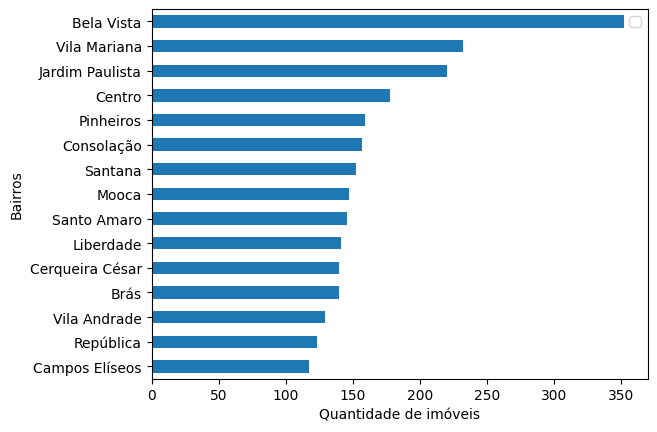

In [17]:
df_bairros.iloc[0:15].sort_values(by='address', ascending=True).plot.barh(x = 'district', y = 'address')
plt.ylabel('Bairros')
plt.legend([])
plt.xlabel('Quantidade de imóveis');

É possível observar que o bairro com mais imóveis para alugar é o Bairro de Bela vista, seguido pelo de Vila Mariana e Jardim Paulista.

### Quantos imóveis de cada tipo o dataset possui?

In [18]:
df_imoveis = df.groupby('type',as_index=False)['address'].count()
df_imoveis['Porcentagem'] = round(100*df_imoveis['address']/sum(df_imoveis['address']),2)
df_imoveis.sort_values('Porcentagem',ascending=False,inplace=True)
df_imoveis.head()

,type,address,Porcentagem
0,Apartamento,7193,61.83
1,Casa,2823,24.27
3,Studio e kitnet,1380,11.86
2,Casa em condomínio,238,2.05


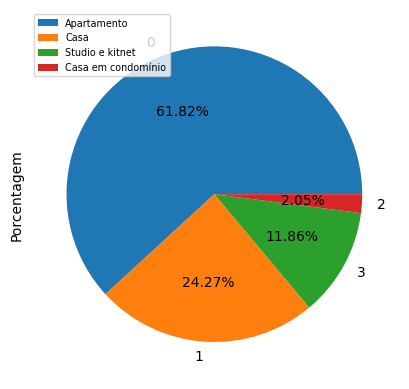

In [19]:
ax = df_imoveis.plot(y='Porcentagem', x='type', kind='pie',autopct='%1.2f%%')
ax.legend(['Apartamento', 'Casa', 'Studio e kitnet', 'Casa em condomínio'], loc = 'upper left', fontsize = 'x-small')


### Qual é a distribuição dos aluguéis na cidade de São Paulo?

In [20]:
df.sort_values(['rent'],ascending=False)

,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24,1,0,Studio e kitnet,25000,26710
9934,Rua Ministro José Geraldo Rodrigues Alckmin,Santo Amaro,418,5,3,Casa,15000,18860
1354,Rua Michigan,Cidade Monções,158,3,3,Apartamento,15000,19530
11132,Rua Bela Cintra,Consolação,189,3,1,Apartamento,15000,19440
11572,Alameda Barretos,Alphaville,397,3,2,Casa em condomínio,15000,16940
...,...,...,...,...,...,...,...,...
6428,Rua Eugênia S Vitale,Taboão,30,1,0,Studio e kitnet,500,594
5901,Rua Manuel José Rodrigues,Sacoma,40,1,0,Casa,500,521
1188,Viela Renaldo Laporta,Vila Aurora (zona Norte),30,1,0,Casa,500,521
51,Rua Tanque Velho,Vila Nivi,45,1,0,Casa,500,551


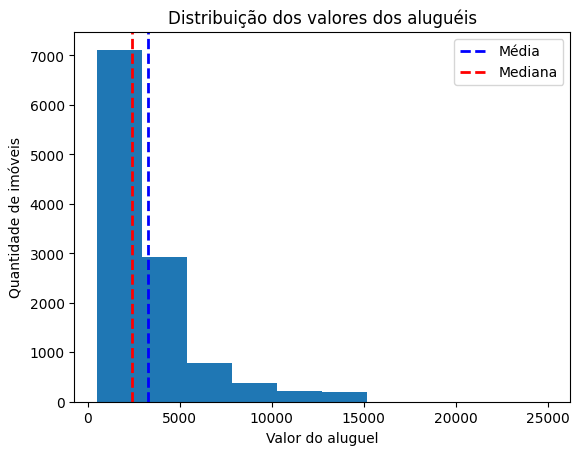

In [19]:
plt.hist(df['rent'], bins = 10)
plt.title('Distribuição dos valores dos aluguéis')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Valor do aluguel')
plt.axvline(df['rent'].mean(), color='b', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(df['rent'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.legend();

Observa-se que a maioria dos imóveis encontra-se abaixo da média de aluguel de R\\$3253. Entretanto, cabe observar que os poucos aluguéis com valores muito altos, elevam essa estatística de tendência central, o que é corroborado pelo alto desvio padrão de R\\$ 2648.

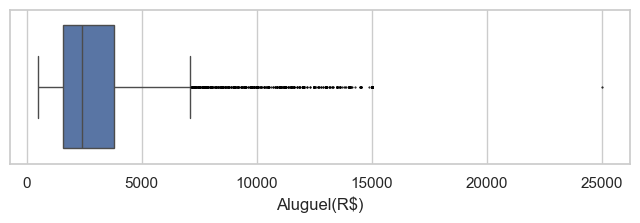

In [99]:
plt.figure(figsize=(8, 2))
sns.set(style="whitegrid")
flierprops = dict(marker='o', markersize=0.5, markerfacecolor='black', markeredgecolor='black')
sns.boxplot(x=df['rent'],flierprops=flierprops)


plt.xlabel('Aluguel(R$)')
plt.ylabel('')
plt.show()

In [47]:
df[['rent']].describe()

,rent
count,11634.000000
mean,3253.186350
std,2648.926876
min,500.000000
25%,1596.250000
50%,2420.000000
75%,3800.000000
max,25000.000000


Observa-se muitos outliers no sentido dos aluguéis mais caros e uma concentração de imóveis com aluguéis entre o primeiro e segundo quartil (R\\$ 1596 - R\\$ 2240).

In [65]:
def testar_normalidade(dataframe, coluna, alpha):
    data_series = dataframe[coluna]
    
    # Teste de Shapiro-Wilk
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(data_series)
    print(f'Teste de Shapiro-Wilk para a coluna "{coluna}":')
    print(f'Estatística de teste: {shapiro_test_statistic}')
    print(f'Valor p: {shapiro_p_value}')
    
    # Teste de Kolmogorov-Smirnov
    ks_test_statistic, ks_p_value = stats.kstest(data_series, 'norm')
    print(f'\nTeste de Kolmogorov-Smirnov para a coluna "{coluna}":')
    print(f'Estatística de teste: {ks_test_statistic}')
    print(f'Valor p: {ks_p_value}')
    
    # Verificar se os valores-p são menores que o nível de significância (por exemplo, 0.05)
    alpha = alpha
    print('\nResultados:')
    if ks_p_value > alpha:
        print(f'Os dados na coluna "{coluna}" parecem seguir uma distribuição normal.')
    else:
        print(f'Os dados na coluna "{coluna}" não seguem uma distribuição normal.')


In [66]:
testar_normalidade(df,'rent', 0.05)

Teste de Shapiro-Wilk para a coluna "rent":
Estatística de teste: 0.7505640387535095
Valor p: 0.0

Teste de Kolmogorov-Smirnov para a coluna "rent":
Estatística de teste: 1.0
Valor p: 0.0

Resultados:
Os dados na coluna "rent" não seguem uma distribuição normal.


Apenas pelo gráfico, era de se esperar que os valores relacionados aos alugueis não seguiam uma distribuição normal. isso pode ser, de fato, confirmado a partir de testes de normalidade como o de Shapiro-Wilk e o de Kolmogorov-Smirnov

### Quais as médias de aluguéis do top 15 bairros com mais imóveis?

In [55]:
df_bairros_alugueis = df.groupby('district', as_index=False).agg(
                       media_rent=pd.NamedAgg(column='rent',aggfunc='mean'),
                       num_imoveis=pd.NamedAgg(column='rent',aggfunc='count')
                      ).sort_values(['num_imoveis','media_rent'],ascending=[False,False])
df_bairros_alugueis.head(15)

,district,media_rent,num_imoveis
26,Bela Vista,2671.352273,352
981,Vila Mariana,3996.043103,232
384,Jardim Paulista,6305.963636,220
67,Centro,2171.539326,178
667,Pinheiros,4709.981132,159
131,Consolação,4160.184713,157
707,Santana,3121.993421,152
562,Mooca,3317.687075,147
708,Santo Amaro,5149.308219,146
549,Liberdade,1831.737589,141


### E para bairros com mais de 50 imóveis, qual o top 15 de médias de aluguéis mais caros?

In [56]:
df_bairros_alugueis_caros = df.groupby('district', as_index=False).agg(
                       media_rent=pd.NamedAgg(column='rent',aggfunc='mean'),
                       num_imoveis=pd.NamedAgg(column='rent',aggfunc='count')
                      ).sort_values('media_rent',ascending=False)
df_bairros_alugueis_caros = df_bairros_alugueis_caros[df_bairros_alugueis_caros['num_imoveis']>=50]
df_bairros_alugueis_caros.head(15)

,district,media_rent,num_imoveis
73,Cerqueira César,6750.657143,140
384,Jardim Paulista,6305.963636,220
583,Paraíso,6285.561798,89
1025,Vila Nova Conceição,6246.766234,77
163,Itaim Bibi,6105.294118,51
52,Campo Belo,5704.842593,108
1139,Vila Suzana,5241.008772,114
708,Santo Amaro,5149.308219,146
1036,Vila Olímpia,5086.919540,87
667,Pinheiros,4709.981132,159


### Qual a distribuição da quantidade de quartos por imóvel?

Text(0.5, 0, 'Quantidade de quartos')

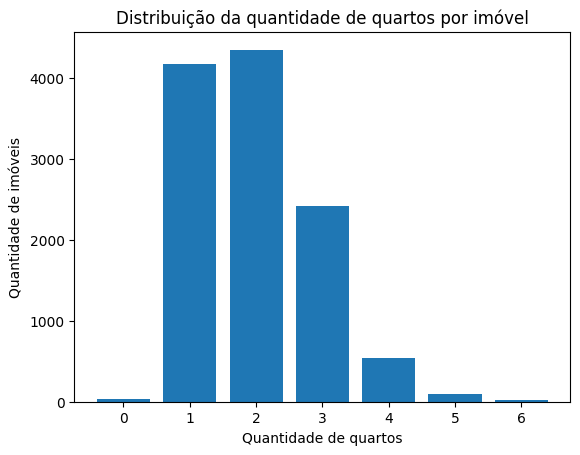

In [63]:
plt.bar(df['bedrooms'].value_counts().sort_index().index, height = df['bedrooms'].value_counts().sort_index().values)
plt.title('Distribuição da quantidade de quartos por imóvel')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Quantidade de quartos')

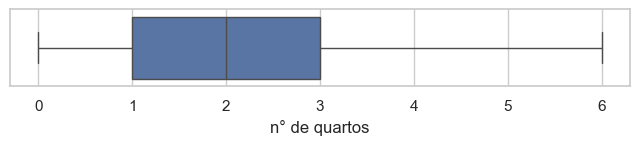

In [98]:
plt.figure(figsize=(8, 1))
sns.set(style="whitegrid")
flierprops = dict(marker='o', markersize=0.5, markerfacecolor='black', markeredgecolor='black')
sns.boxplot(x=df['bedrooms'],flierprops=flierprops)


plt.xlabel('n° de quartos')
plt.ylabel('')
plt.show()

In [62]:
testar_normalidade(df,'bedrooms', 0.05)

Teste de Shapiro-Wilk para a coluna "bedrooms":
Estatística de teste: 0.8483575582504272
Valor p: 0.0

Teste de Kolmogorov-Smirnov para a coluna "bedrooms":
Estatística de teste: 0.8381644125632997
Valor p: 0.0

Resultados:
Os dados na coluna "bedrooms" não seguem uma distribuição normal.


### Distribuição da área dos imóveis

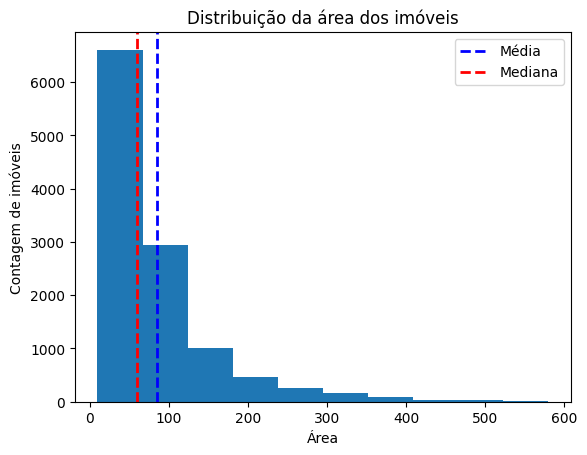

In [58]:
plt.hist(df['area'])
plt.title('Distribuição da área dos imóveis')
plt.ylabel('Contagem de imóveis')
plt.xlabel('Área')
plt.axvline(df['area'].mean(), color='b', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(df['area'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.legend()

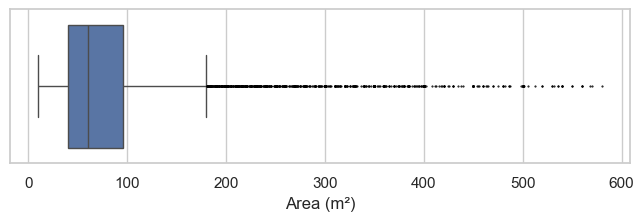

In [97]:
plt.figure(figsize=(8, 2))
sns.set(style="whitegrid")
flierprops = dict(marker='o', markersize=0.5, markerfacecolor='black', markeredgecolor='black')
sns.boxplot(x=df['area'],flierprops=flierprops)


plt.xlabel('Area (m²)')
plt.ylabel('')
plt.show()

In [59]:
df[['area']].describe()

,area
count,11634.000000
mean,84.800584
std,74.021208
min,10.000000
25%,40.000000
50%,60.000000
75%,96.000000
max,580.000000


In [67]:
testar_normalidade(df,'area', 0.05)

Teste de Shapiro-Wilk para a coluna "area":
Estatística de teste: 0.712838888168335
Valor p: 0.0

Teste de Kolmogorov-Smirnov para a coluna "area":
Estatística de teste: 1.0
Valor p: 0.0

Resultados:
Os dados na coluna "area" não seguem uma distribuição normal.


Foi possível oberservar que, assim como nos outros dados, os testes comprovaram que a área dos imóveis não segue uma distribuição normal.

## Tendências

Gostaríamos aqui de avaliar as relações entre o valor dos aluguéis com área dos imóveis e número de quartos.

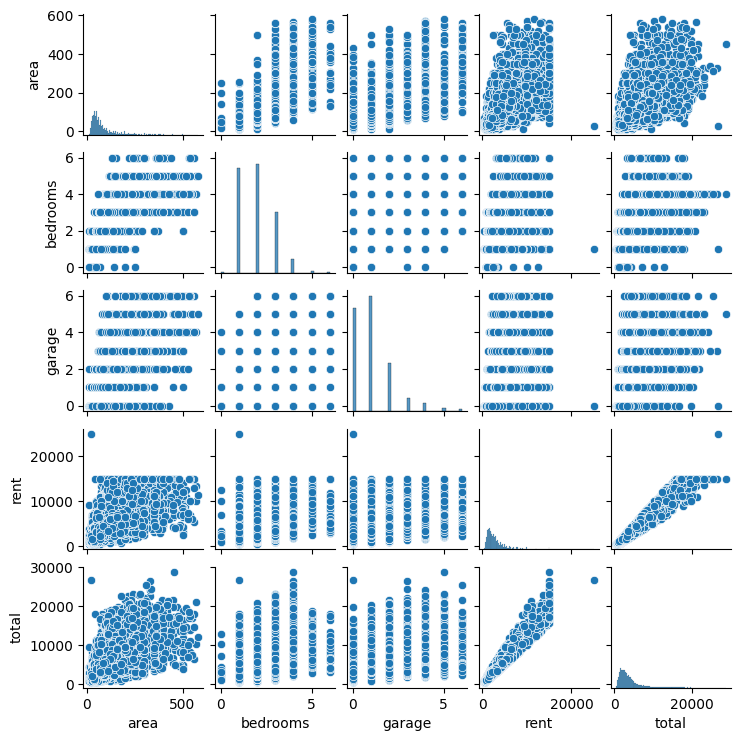

In [30]:
sns.pairplot(df, height = 1.5)

              rent  bedrooms      area
rent      1.000000  0.531260  0.668088
bedrooms  0.531260  1.000000  0.728144
area      0.668088  0.728144  1.000000


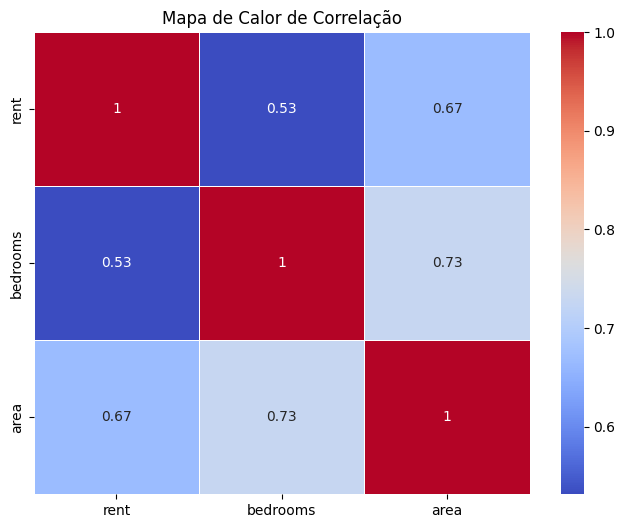

In [38]:
columns= ['rent', 'bedrooms', 'area']
df_select= df[columns]

correlation_matrix = df_select.corr()
print(correlation_matrix)

# Plotando matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlação')
plt.show()

É possível observar que as variáveis são positivamente correlacionadas... indicando que quanto maior o valor do aluguel, maior o número de quartos e maior a área do imóvel. O que já era de se esperar intuitivamente.

## Análises por bairro (top 3 mais imóveis)

Partindo das análises que foram feitas anteriormente, vamos aplicar as mesmas métricas para analisar as informações dos bairros com maior número de imóveis, sendo eles:
- Bela Vista;
- Vila Mariana;
- Jardim Paulista;

In [48]:
def qtde_tipo_imovel(df_bairro):
    df_bairro_tipos = df_bairro.groupby('type', as_index=False).agg(
                       num_imoveis=pd.NamedAgg(column='type',aggfunc='count')
                      ).sort_values('type')
    df_bairro_tipos['porcentagem'] = df_bairro_tipos['num_imoveis']/sum(df_bairro_tipos['num_imoveis'])
    ax = df_bairro_tipos.plot(y='porcentagem', x='type', kind='pie',autopct='%1.2f%%')
    ax.legend(df_bairro_tipos['type'].to_list(), loc = 'upper left', fontsize = 'x-small')
    plt.show()

In [42]:
def dist_alugueis(df_bairro, bairro):
    plt.hist(df_bairro['rent'], bins = 10, color ='gray')
    plt.title(f'Distribuição dos valores dos aluguéis no bairro {bairro}')
    plt.ylabel('Quantidade de imóveis')
    plt.xlabel('Valor do aluguel')
    plt.axvline(df_bairro['rent'].mean(), color='b', linestyle='dashed', linewidth=2, label='Média')
    plt.axvline(df_bairro['rent'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
    plt.legend()
    plt.show()
    print(df_bairro['rent'].describe())

In [45]:
def dist_quartos(df_bairro, bairro):
    plt.bar(df_bairro['bedrooms'].value_counts().sort_index().index, height = df_bairro['bedrooms'].value_counts().sort_index().values,color ='gray')
    plt.title(f'Distribuição da quantidade de quartos por imóvel no bairro {bairro}')
    plt.ylabel('Quantidade de imóveis')
    plt.xlabel('Quantidade de quartos')
    plt.show()

In [44]:
def dist_areas(df_bairro, bairro):
    plt.hist(df_bairro['area'],color ='gray')
    plt.title(f'Distribuição da área dos imóveis no bairro {bairro}')
    plt.ylabel('Contagem de imóveis')
    plt.xlabel('Área')
    plt.axvline(df_bairro['area'].mean(), color='b', linestyle='dashed', linewidth=2, label='Média')
    plt.axvline(df_bairro['area'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
    plt.legend()
    plt.show()
    print(df_bairro['area'].describe())

In [46]:
def analise_bairro(dataframe, bairro):
    df_bairro = dataframe[dataframe['district']==bairro]
    qtde_tipo_imovel(df_bairro)
    dist_alugueis(df_bairro, bairro)
    dist_quartos(df_bairro, bairro)
    dist_areas(df_bairro,bairro)
    

### Análise bairro Bela Vista:

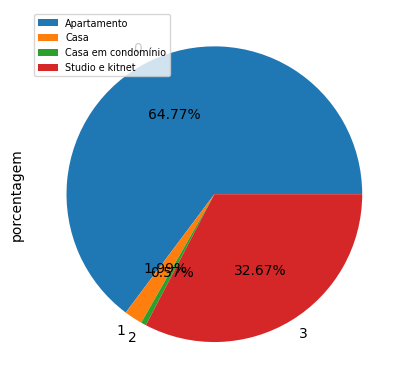

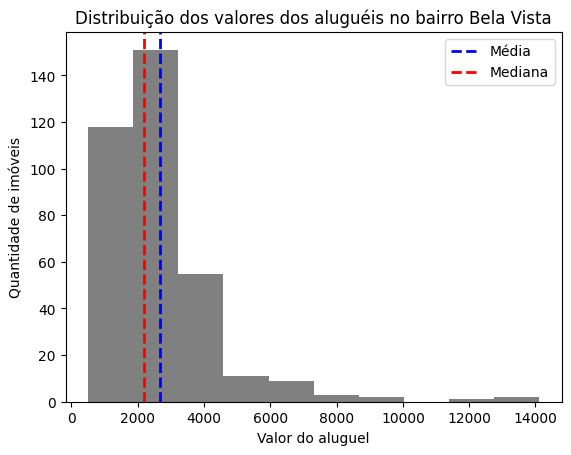

count      352.000000
mean      2671.352273
std       1708.871489
min        504.000000
25%       1648.500000
50%       2200.000000
75%       3127.500000
max      14110.000000
Name: rent, dtype: float64


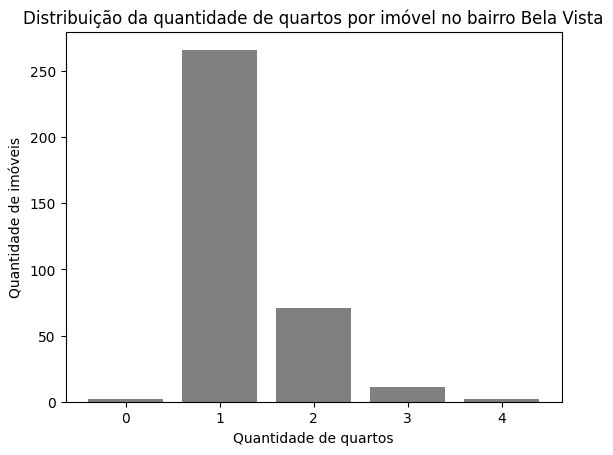

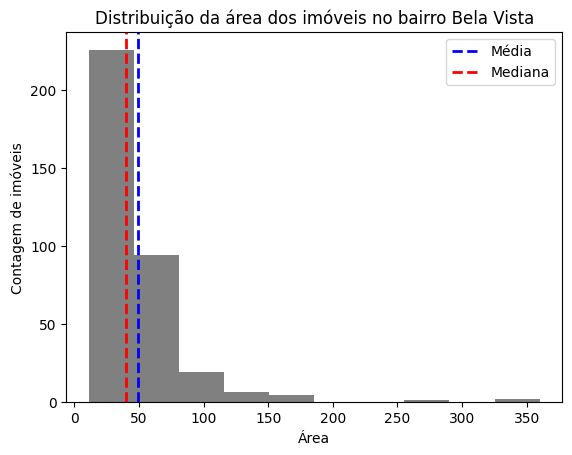

count    352.000000
mean      49.468750
std       35.712992
min       11.000000
25%       32.000000
50%       40.000000
75%       55.000000
max      360.000000
Name: area, dtype: float64


In [49]:
top1 = df_bairros.iloc[0]['district']
analise_bairro(df,top1)

### Análise bairro Vila Mariana:

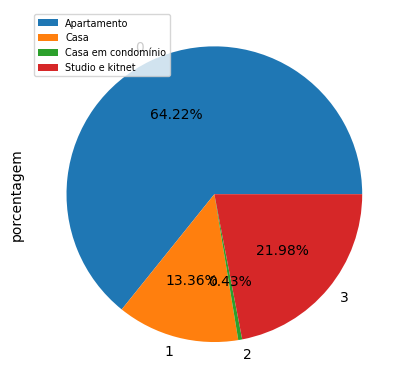

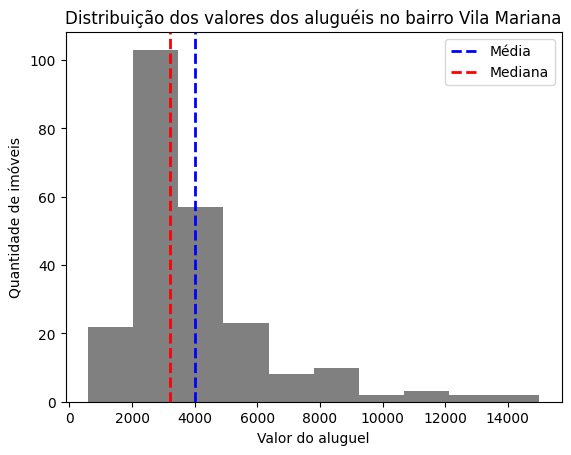

count      232.000000
mean      3996.043103
std       2351.306846
min        600.000000
25%       2500.000000
50%       3225.000000
75%       4625.000000
max      15000.000000
Name: rent, dtype: float64


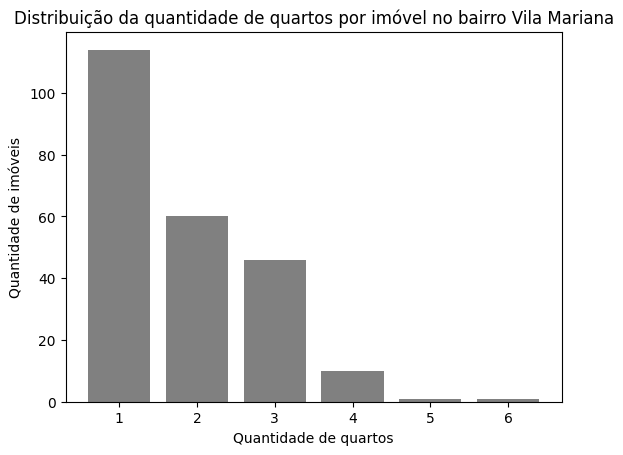

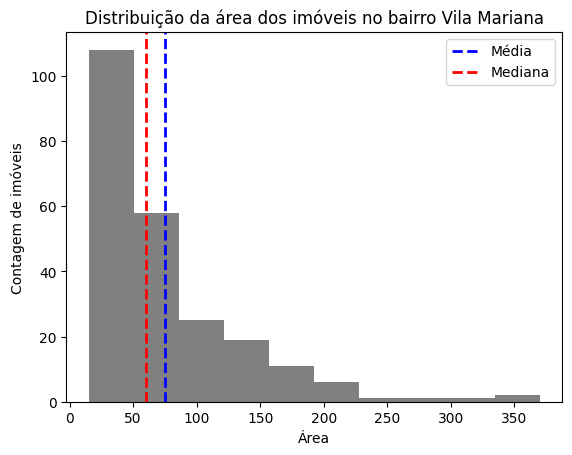

count    232.000000
mean      75.112069
std       59.259247
min       15.000000
25%       32.000000
50%       60.000000
75%       95.250000
max      370.000000
Name: area, dtype: float64


In [50]:
top2 = df_bairros.iloc[1]['district']
analise_bairro(df,top2)

### Análise bairro Jardim Paulista:

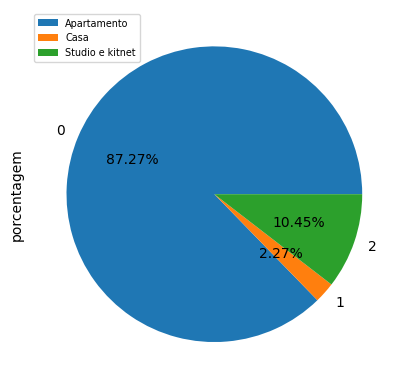

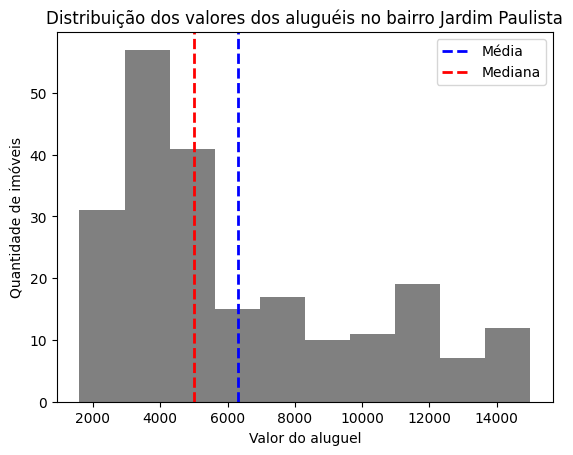

count      220.000000
mean      6305.963636
std       3628.553740
min       1600.000000
25%       3462.000000
50%       5000.000000
75%       9056.250000
max      15000.000000
Name: rent, dtype: float64


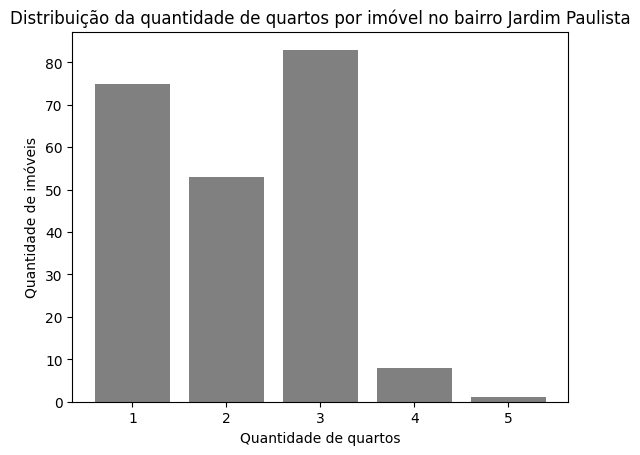

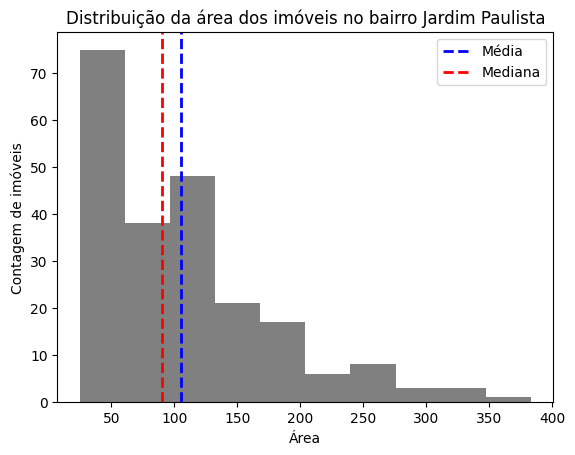

count    220.000000
mean     105.581818
std       70.385550
min       25.000000
25%       49.250000
50%       90.000000
75%      140.000000
max      383.000000
Name: area, dtype: float64


In [51]:
top3 = df_bairros.iloc[2]['district']
analise_bairro(df,top3)

Foi possível perceber que a maioria dos imóveis para alugar nos três bairros são do tipo apartamento, principalmente para o bairro de Jardim Paulista, que acumula 87% dos imóveis. Em relação aos alugueis, o bairro de Jardim Paulista também apresenta os valores mais altos com média de R\\$3628. Isso está de acordo com as expectativas do bairro pois "a localização privilegiada e a proximidade do maior parque da cidade e de avenidas importantes da cidade, torna o Jardim Paulista um dos bairros mais caros da cidade de São Paulo, com imóveis que chegaram a ter o metro quadrado a ser comercializados por valores acima dos R\\$16.000,00 [Wikipédia](https://pt.wikipedia.org/wiki/Jardim_Paulista_(bairro_de_S%C3%A3o_Paulo))". É interessante perceber que, devido aos altos valores, muitos deles sendo outliers nessa base, a média de aluguel e área, sempre é levado para valores maiores. 

## Regressão Logística

Regressão a fim de tentar estimar qual o tipo de imóvel com base nas informações da dataset

Disclaimers:

- Não está sendo aplicado fine-tuning no modelo
- Considerar desbalanceamento de classe

In [2]:
#Regressão Logistica - Baseline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score


In [56]:
df_rg = df.copy() #Copia do df

#Instancia do enconder
encoder = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')

#Enconding do target
df_rg['type'] = encoder.fit_transform(df_rg['type'])

#Separar target e features
X = df_rg[['area','bedrooms','garage','rent','district']]
y = df_rg['type']

#Train e test split
X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

#Instancia do modelo
#model = LogisticRegressionCV(cv=10)
model = LogisticRegression(max_iter=1_000_000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Acurácia: 0.76
AUC Score :  0.8591190797506096


              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2914
           1       0.71      0.63      0.66      1096
           2       0.00      0.00      0.00        98
           3       0.60      0.53      0.56       546

    accuracy                           0.76      4654
   macro avg       0.53      0.51      0.52      4654
weighted avg       0.74      0.76      0.75      4654



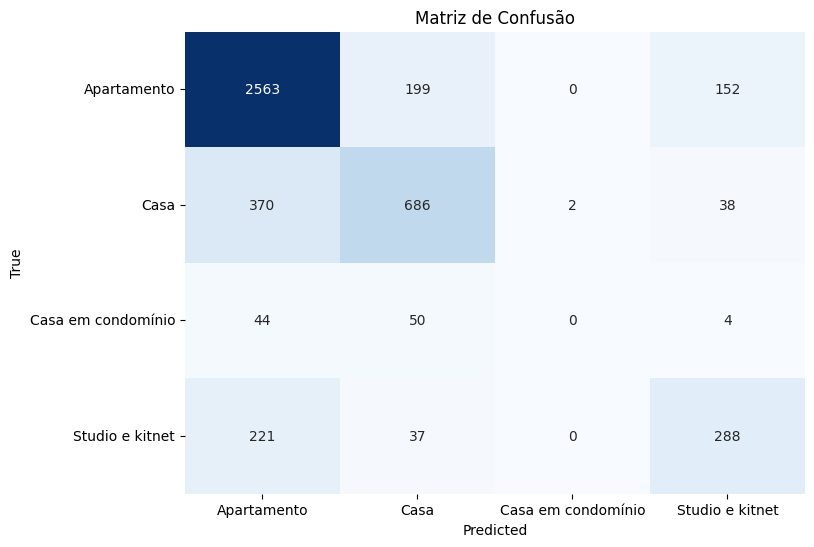

In [57]:
#Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

print('AUC Score : ',roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
print('\n')

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


Como os parâmetros estatísticos estão longe de serem parecidos com uma distribuição normal, vamos comparar as métricas de classificação com um classificador não-paramétrico:

Acurácia: 0.73 

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      2914
           1       0.71      0.49      0.58      1096
           2       0.33      0.02      0.04        98
           3       0.55      0.46      0.50       546

    accuracy                           0.73      4654
   macro avg       0.59      0.46      0.48      4654
weighted avg       0.71      0.73      0.71      4654



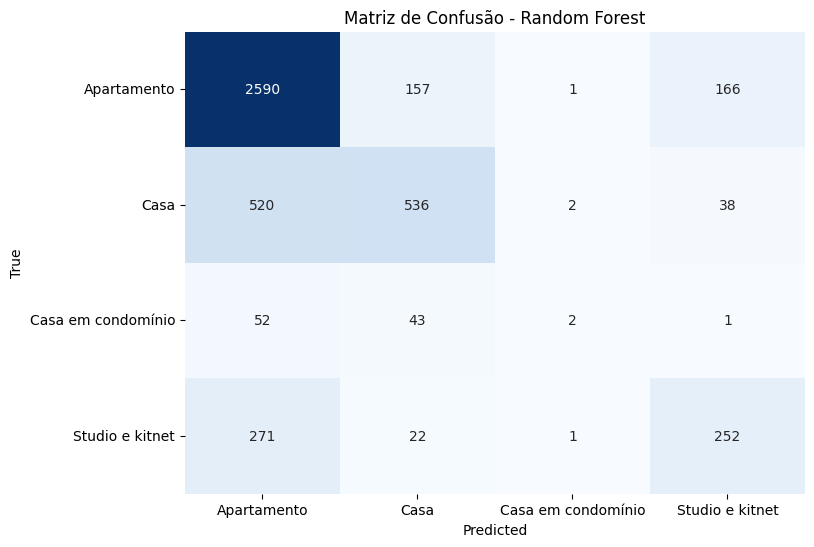

In [65]:
from sklearn.ensemble import RandomForestClassifier
# Instancia do modelo Random Forest para classificação
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamento do modelo Random Forest
rf_classifier.fit(X_train, y_train)

# Previsões
y_pred = rf_classifier.predict(X_test)

# Avaliação do modelo Random Forest
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f} \n')

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão - Random Forest')
plt.show()